# Titanic ML - Logistics Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values
Find out the missing Values and Carry forward Imputation for the Same

In [3]:
## Find the rows and columns in the Data Frame
print(df.shape)
## To find the Columns which have atleast one NaN Value.
df.loc[:,df.isna().any()]
## we got 3 Column - Age, Cabin and Embarked
df.loc[:,df.isna().any()].columns.tolist()

(891, 12)


['Age', 'Cabin', 'Embarked']

### Missing Values : Age Column

In [4]:
## Missing Values are Imputed with MEAN, in new Column 'Age_New'
# print(df['Age'].mode()[0])
df['Age_New'] = df['Age'].fillna(df['Age'].mean())
# df['Age_New'] = df['Age'].fillna(df['Age'].mode()[0])
# df['Age_New'] = df['Age'].fillna(df['Age'].max())
print(df['Age_New'].describe())

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_New, dtype: float64


### Missing Values: Cabin

In [5]:
## Cabin is Category Type Feature.
# df[df['Cabin'].isnull()].count() ## 687 Cabin's are NaN - which is very high
# check how Cabin effects the Survied?? 
# df[df['Cabin'].isnull()== False]['Survived'].value_counts() ## impact is huge to Survived where cabin is NaN
# to populate the NaN values, check the Fare vs Cabin
# df[(df['Cabin'].isnull()== False) & (df['Survived']==1)].loc[:,('Fare','Embarked')].sort_values(['Fare'])

##Create a new Column Cabin_New - Making Nan as 1 and rest a 0.
df['Cabin_New'] = df['Cabin'].fillna(1)
df['Cabin_New'] = df['Cabin_New'].apply(lambda x: 0 if x != 1 else x)
df['Cabin_New'].value_counts()

1    687
0    204
Name: Cabin_New, dtype: int64

### Missing Vaules: Embarked

In [6]:
# print(df[df['Embarked'].isnull()])
df[(df['Fare'] > 80.0) &(df['Pclass'] == 1)].sort_values(['Fare'])
#replaing NaN by S
df['Embarked_New'] = df['Embarked'].fillna('S')
df['Embarked_New'].value_counts()


S    646
C    168
Q     77
Name: Embarked_New, dtype: int64

## Categorical Encoding

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_New', 'Cabin_New',
       'Embarked_New'],
      dtype='object')

In [8]:
##One Hot Encoding for features - Pclass, Sex, Embarked
df1 = pd.get_dummies(df,columns=['Pclass','Sex','Embarked_New'],drop_first=True)
df1.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_New,Cabin_New,Pclass_2,Pclass_3,Sex_male,Embarked_New_Q,Embarked_New_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,35.0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,35.0,1,0,1,1,0,1


In [9]:
# del df1['Pclass_3','Sex_female','Embarked_New_Q'] # No need to run this as drop_first=True, has worked well.

## Building the Model

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [11]:
df1.columns
#

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age_New', 'Cabin_New', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_New_Q', 'Embarked_New_S'],
      dtype='object')

In [12]:
#Train on Features - 'SibSp', 'Parch','Age_New', 'Cabin_New', 'Pclass_2','Pclass_3', 'Sex_male', 
#'Embarked_New_Q', 'Embarked_New_S'
##Note: .values -- changes the ouput to numpy array - which is needed by Models
X = df1[['SibSp', 'Parch','Age_New', 'Cabin_New', 'Pclass_2','Pclass_3', 
              'Sex_male','Embarked_New_Q', 'Embarked_New_S']].values
print(type(X))

<class 'numpy.ndarray'>


In [13]:
y = df1[['Survived']].values
print(type(y))

<class 'numpy.ndarray'>


### Train Test Split

In [14]:
#X_train and y_train
#X_test and y_test
#Split is 75% and 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# print(X_train,y_train)

<class 'numpy.ndarray'>


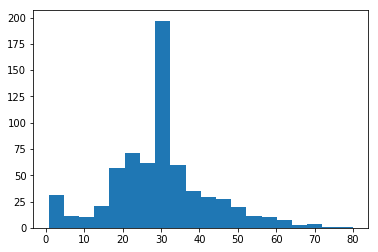

In [15]:
print(type(X_train))
plt.hist(X_train[:,2], bins=20);

### Feature Scaling

##### For Feature Scaling Import the Class from SkLearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
##Fit Transform
X_train_sc = sc.fit_transform(X_train)
X_train_sc

array([[-0.46037161, -0.47720996, -0.14358693, ...,  0.72705166,
        -0.31414043,  0.59809997],
       [ 2.98532288,  1.95619654, -0.99275516, ..., -1.37541808,
        -0.31414043,  0.59809997],
       [ 0.40105202, -0.47720996,  0.01080729, ...,  0.72705166,
        -0.31414043,  0.59809997],
       ...,
       [-0.46037161, -0.47720996, -0.01241996, ...,  0.72705166,
         3.1832897 , -1.67196129],
       [ 0.40105202, -0.47720996,  0.47398996, ..., -1.37541808,
        -0.31414043,  0.59809997],
       [ 0.40105202,  0.73949329,  2.32672063, ...,  0.72705166,
        -0.31414043,  0.59809997]])

In [18]:
sc.mean_

array([ 0.53443114,  0.39221557, 29.86000396,  0.76497006,  0.20658683,
        0.5494012 ,  0.65419162,  0.08982036,  0.73652695])

In [19]:
sc.var_

array([1.34761689e+00, 6.75508265e-01, 1.67802296e+02, 1.79790867e-01,
       1.63908710e-01, 2.47559522e-01, 2.26224945e-01, 8.17526623e-02,
       1.94055004e-01])

In [20]:
##Transform the X_Test, they same X_train was Fit_Transform
X_test_sc = sc.transform(X_test)

In [21]:
import seaborn as sns

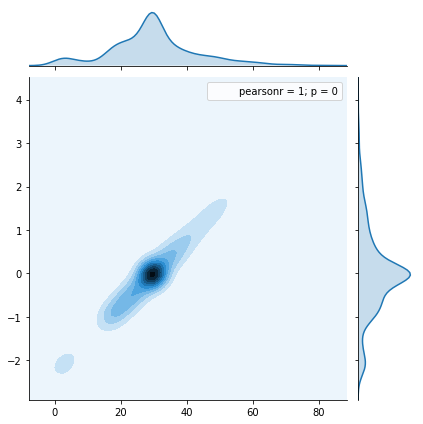

In [22]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train[:,2], X_train_sc[:,2], kind='kde')

In [23]:
#Never Scale Y - as Y is 0 or 1.
# y_train_sc = sc.fit_transform(y_train)
# y_test_sc = sc.transform(y_test)
# print(y_test_sc)

## Logistic Regression

In [24]:
# Fitting Logistic Regression to the Training set, on scaled data set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_sc, y_train)
# models.append('Logistic Regression')

C:\Users\vinay.d.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# lr.classes_
# lr.get_params
# lr.multi_class
lr.intercept_

array([-0.62285128])

In [26]:
print('Coeff: ',lr.coef_)
print('Intercept: ' ,lr.intercept_)
print('Iterations: ',lr.n_iter_)

Coeff:  [[-0.37231296 -0.05205546 -0.50116266 -0.38128527 -0.07757625 -0.66826746
  -1.26716704 -0.02642397 -0.22639857]]
Intercept:  [-0.62285128]
Iterations:  [5]


In [27]:
##Predict the Model use the Scaled Data Frame X_test_sc
lr.predict(X_test_sc)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [28]:
probs = lr.predict_proba(X_test_sc)
probs

array([[0.84964374, 0.15035626],
       [0.90428315, 0.09571685],
       [0.90823297, 0.09176703],
       [0.05447601, 0.94552399],
       [0.30306468, 0.69693532],
       [0.50085526, 0.49914474],
       [0.09429926, 0.90570074],
       [0.07700466, 0.92299534],
       [0.40815463, 0.59184537],
       [0.28244399, 0.71755601],
       [0.91859097, 0.08140903],
       [0.23660187, 0.76339813],
       [0.86107239, 0.13892761],
       [0.08936257, 0.91063743],
       [0.03244622, 0.96755378],
       [0.2638983 , 0.7361017 ],
       [0.87937986, 0.12062014],
       [0.74352673, 0.25647327],
       [0.92062215, 0.07937785],
       [0.65979618, 0.34020382],
       [0.65512335, 0.34487665],
       [0.11310554, 0.88689446],
       [0.86107239, 0.13892761],
       [0.71149205, 0.28850795],
       [0.32820871, 0.67179129],
       [0.08377564, 0.91622436],
       [0.91171566, 0.08828434],
       [0.32820871, 0.67179129],
       [0.15598777, 0.84401223],
       [0.40101577, 0.59898423],
       [0.

### Evaluation of Logistics Regression Classification

In [29]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)

In [30]:
print('Confusion Matrix for LR: \n',confusion_matrix(y_test, lr.predict(X_test_sc)))
print('Accuracy for LR: \n',accuracy_score(y_test, lr.predict(X_test_sc)))
# acc.append(accuracy_score(y_test, lr.predict(X_test_sc)))
print('Precision for LR: \n',precision_score(y_test, lr.predict(X_test_sc)))
# precision.append(precision_score(y_test, lr.predict(X_test_sc)))
print('Recall for LR: \n',recall_score(y_test, lr.predict(X_test_sc)))
# recall.append(recall_score(y_test, lr.predict(X_test_sc)))
print('f1_score for LR: \n',f1_score(y_test, lr.predict(X_test_sc)))
# f1.append(f1_score(y_test, lr.predict(X_test_sc)))

Confusion Matrix for LR: 
 [[118  21]
 [ 22  62]]
Accuracy for LR: 
 0.8071748878923767
Precision for LR: 
 0.7469879518072289
Recall for LR: 
 0.7380952380952381
f1_score for LR: 
 0.7425149700598803


In [31]:
X_test_sc.shape

(223, 9)

In [ ]:
#df[(df['Name'].str.contains('Miss')) & (df['Survived'] == 0)].count()
# .groupby(['Survived']).count() ## to match the string in a column